In [1]:
import scanpy as sc
import pandas as pd
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()
# get 3k PBMC dataset with scanpy as an AnnData object
adata = sc.datasets.pbmc3k()
print(adata)
print(adata.var)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 pynndescent==0.5.10
AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
                     gene_ids
index                        
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC145205.1    ENSG00000215635
BAGE5         ENSG00000268590
CU459201.1    ENSG00000251180
AC002321.2    ENSG00000215616
AC002321.1    ENSG00000215611

[32738 rows x 1 columns]


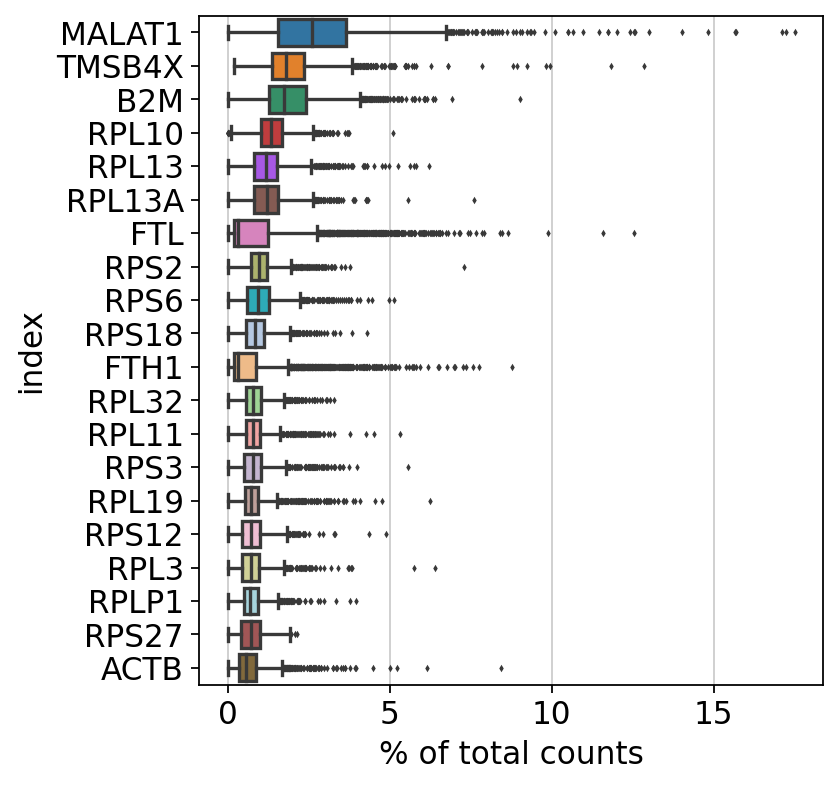

In [2]:
# show those genes that yield the highest fraction of counts in each single cell, across all cells
sc.pl.highest_expr_genes(adata, n_top=20)

In [3]:
# filter cells with less than 200 detected genes and genes which were found in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

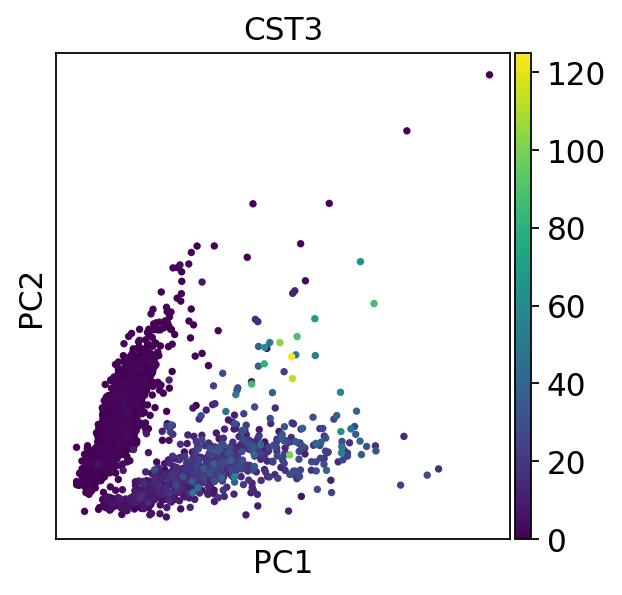

In [4]:
# dimensionality reduction with PCA
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca(adata, color="CST3")

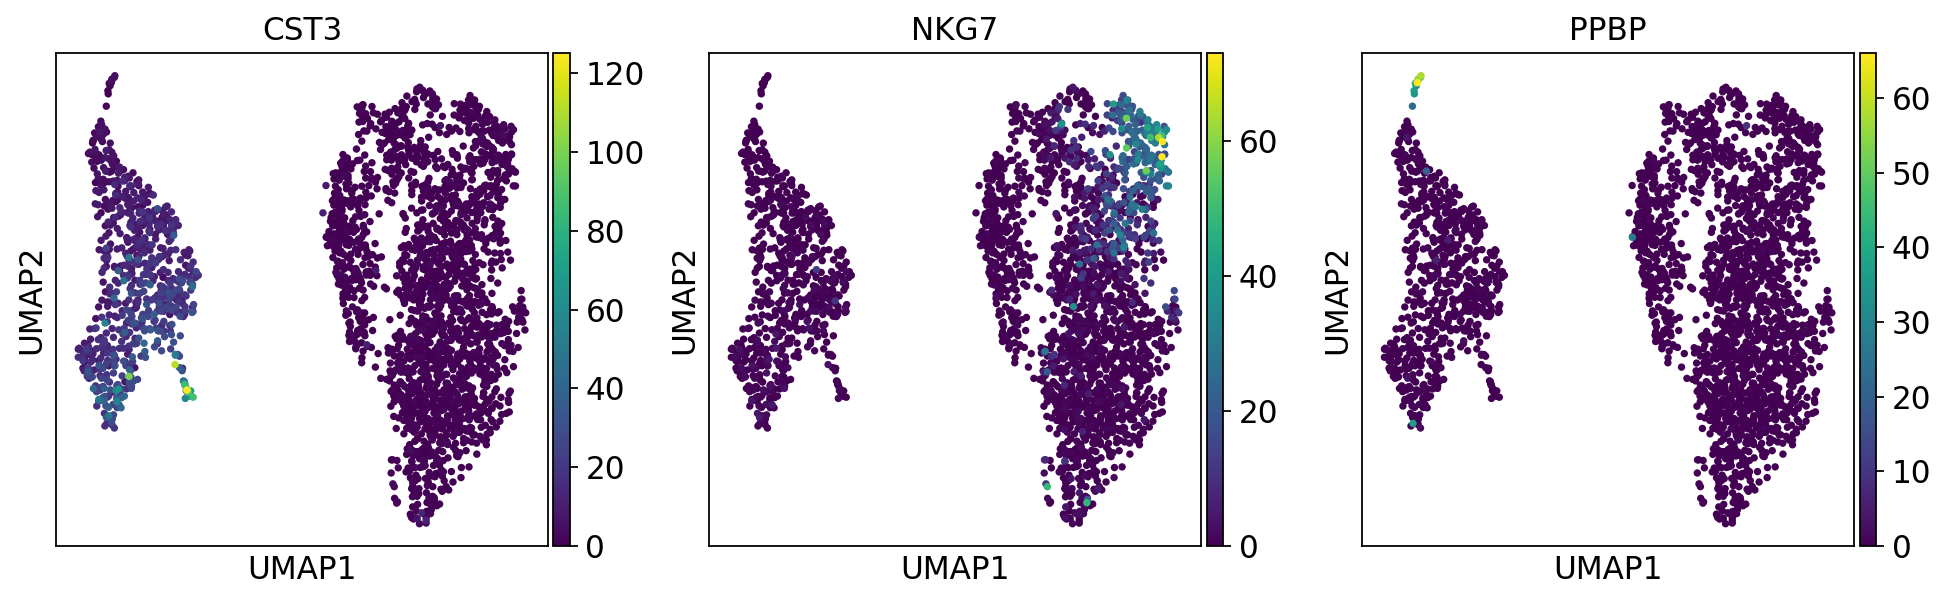

In [5]:
# calculating neighborhood graph to embed the cells with a UMAP
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])